<a href="https://colab.research.google.com/github/vidhi2919/Farmify/blob/main/Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -sSfL 'https://github.com/GaiaNet-AI/gaianet-node/releases/latest/download/install.sh' | bash


 ██████╗  █████╗ ██╗ █████╗ ███╗   ██╗███████╗████████╗
██╔════╝ ██╔══██╗██║██╔══██╗████╗  ██║██╔════╝╚══██╔══╝
██║  ███╗███████║██║███████║██╔██╗ ██║█████╗     ██║
██║   ██║██╔══██║██║██╔══██║██║╚██╗██║██╔══╝     ██║
╚██████╔╝██║  ██║██║██║  ██║██║ ╚████║███████╗   ██║
 ╚═════╝ ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝  ╚═══╝╚══════╝   ╚═╝


[+] Installing gaianet CLI tool ...
############################################################################################# 100.0%
############################################################################################# 100.0%
    * gaianet CLI tool is installed in /root/gaianet/bin

[+] Downloading default config.json ...
############################################################################################# 100.0%
    * The default config file is downloaded in /root/gaianet

[+] Downloading nodeid.json ...
############################################################################################# 100.0%
    * The nodeid.json is downloaded in /r

In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 42.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import os
import torch

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 314MB/s]


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="j2r69PrqevJc3UY4LlFI")
project = rf.workspace().project("crop-disease-identification-nqsxi")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.98, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Crop-Disease-Identification-1 in yolov8:: 100%|██████████| 2092/2092 [00:00<00:00, 4001.37it/s]


In [ ]:
with open('/content/Crop-Disease-Identification-1/data.yaml', 'r') as file:
    data_yaml = file.read()
print(data_yaml)

names:
- bell pepper leaf-healthy
- bell pepper leaf-unhealthy
- cucumber leaf - healthy
- cucumber leaf - unhealthy
- cucumber veggie - healthy
- cucumber veggie - unhealthy
- cucumber-mosaic
- cucumber-powdery-mildew
- lettuce-bacterial leaf spot
- lettuce-downy mildew
- lettuce-healthy
- lettuce-mosaic-virus
- lettuce-powdery mildew
- lettuce-septoria
- lettuce-wilt and leaf blight
- strawberry fruit-healthy
- strawberry leaf-healthy
- strawberry-angular-leafspot
- tomato-early blight
- tomato-healthy
nc: 20
roboflow:
  license: CC BY 4.0
  project: crop-disease-identification-nqsxi
  url: https://universe.roboflow.com/pari-gupta-rwz5t/crop-disease-identification-nqsxi/dataset/1
  version: 1
  workspace: pari-gupta-rwz5t
test: ../test/images
train: Crop-Disease-Identification-1/train/images
val: Crop-Disease-Identification-1/valid/images



In [ ]:
data_yaml = data_yaml.replace('/content/Crop-Disease-Identification-1/', '/content/datasets/Crop-Disease-Identification-1/')

with open('/content/Crop-Disease-Identification-1/data.yaml', 'w') as file:
    file.write(data_yaml)

In [ ]:
# Read the YAML file
with open('/content/Crop-Disease-Identification-1/data.yaml', 'r') as file:
    data_yaml = file.read()

# Update paths
data_yaml = data_yaml.replace('Crop-Disease-Identification-1/train/images', '/content/Crop-Disease-Identification-1/train')
data_yaml = data_yaml.replace('Crop-Disease-Identification-1/valid/images', '/content/Crop-Disease-Identification-1/valid')
data_yaml = data_yaml.replace('../test/images', '/content/Crop-Disease-Identification-1/test')

# Write the updated YAML file
with open('/content/Crop-Disease-Identification-1/data.yaml', 'w') as file:
    file.write(data_yaml)


In [ ]:
new_model = model.train(data='/content/Crop-Disease-Identification-1/data.yaml',epochs = 50 , batch = -1, optimizer = 'auto')

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Crop-Disease-Identification-1/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/Crop-Disease-Identification-1/train/labels.cache... 729 images, 5 backgrounds, 0 corrupt: 100%|██████████| 729/729 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Crop-Disease-Identification-1/valid/labels.cache... 206 images, 3 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000734375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train22
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.7G     0.5071     0.9574     0.9661        216        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all        206        603      0.644      0.322      0.376      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.8G     0.5009     0.9371     0.9527        216        640: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]


                   all        206        603      0.515      0.379      0.361       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.4G     0.4966     0.9088     0.9596        209        640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]


                   all        206        603      0.594      0.323      0.351      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        12G     0.5029     0.9337     0.9613        186        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        206        603      0.566      0.349      0.363      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.1G     0.4959     0.9355     0.9474        263        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        206        603      0.506      0.345      0.372      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.9G     0.5194     0.9941      0.966        178        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all        206        603      0.606      0.339       0.35      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.1G      0.526     0.9628     0.9631        191        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all        206        603      0.535      0.365      0.319      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.8G      0.551     0.9976     0.9758        193        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        206        603      0.584      0.314      0.341      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.1G     0.5565      0.986     0.9771        233        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        206        603      0.469      0.321      0.315      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.8G      0.558      1.002      0.984        190        640: 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        206        603      0.446      0.293      0.292      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.7G     0.5643      1.011      0.985        212        640: 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]


                   all        206        603      0.443      0.366      0.328      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.4G     0.5633      1.015     0.9835        165        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]


                   all        206        603      0.433      0.352      0.333      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.8G     0.5738      1.058     0.9943        168        640: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        206        603      0.517      0.296      0.312      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.9G     0.5697       1.03      0.987        206        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        206        603      0.506      0.319      0.295       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        13G     0.5808      1.056     0.9957        206        640: 100%|██████████| 8/8 [00:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        206        603      0.471       0.31      0.302      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.7G     0.5758      1.026     0.9898        205        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]


                   all        206        603      0.391      0.346      0.287      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.7G     0.5667     0.9634     0.9842        245        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        206        603      0.538      0.295      0.302      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.3G     0.5568     0.9658     0.9781        223        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all        206        603      0.374      0.365      0.299      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.4G     0.5651     0.9585     0.9877        201        640: 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]


                   all        206        603      0.454      0.302      0.325      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.7G     0.5534     0.9397     0.9773        214        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]

                   all        206        603      0.344      0.341      0.333      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.8G     0.5615     0.9183     0.9821        192        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        206        603      0.421      0.353      0.326       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.9G     0.5349     0.8858     0.9657        209        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


                   all        206        603      0.521      0.357      0.316      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.1G     0.5421     0.8685     0.9685        233        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        206        603      0.463      0.349      0.318      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.2G     0.5103     0.8297     0.9554        223        640: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all        206        603      0.525      0.333      0.332      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.5G     0.5318     0.8381     0.9672        160        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        206        603      0.516      0.326      0.328      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.8G     0.5299     0.8364     0.9683        208        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        206        603      0.445       0.33      0.329      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.3G     0.5101     0.8067     0.9465        201        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        206        603       0.47      0.361      0.329      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.8G     0.4925     0.7874     0.9425        193        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]


                   all        206        603      0.449      0.321      0.332      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.8G     0.4976     0.7682     0.9358        242        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all        206        603      0.456      0.369      0.312      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.9G     0.4956     0.7548     0.9321        206        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


                   all        206        603       0.46      0.361      0.326      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.1G     0.4836     0.7477     0.9363        203        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


                   all        206        603      0.443      0.344      0.347      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.4G     0.4828      0.725     0.9406        212        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        206        603      0.477      0.366      0.352      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        13G     0.4706     0.7149     0.9309        194        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.60s/it]

                   all        206        603      0.456       0.36      0.345      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.1G     0.4678     0.7074      0.922        168        640: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all        206        603      0.413      0.342      0.344      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.3G     0.4626     0.6822     0.9252        213        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


                   all        206        603      0.378      0.366      0.349      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.1G     0.4666     0.6867     0.9275        196        640: 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        206        603      0.482      0.344      0.338      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.8G     0.4593     0.6718     0.9175        170        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all        206        603       0.45      0.372      0.357      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.7G      0.448     0.6608     0.9171        198        640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all        206        603      0.442      0.359      0.365      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.8G     0.4451     0.6522     0.9025        189        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        206        603      0.585      0.321      0.357      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.2G     0.4424     0.6491     0.9043        192        640: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


                   all        206        603      0.485      0.385      0.351      0.255
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.6G     0.4381      0.648     0.9072        192        640: 100%|██████████| 8/8 [00:17<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        206        603      0.591      0.312      0.361      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.9G     0.4223     0.6257      0.899        252        640: 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        206        603      0.518      0.368      0.364      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.7G     0.4213     0.6133     0.9048        209        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all        206        603      0.474      0.397      0.368      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.2G     0.4177     0.6081     0.8982        227        640: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        206        603      0.447      0.412      0.369      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.8G     0.4084     0.5861     0.8995        178        640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]

                   all        206        603      0.459      0.398       0.36       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.5G     0.4212     0.6177     0.9018        232        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        206        603      0.477      0.381      0.355      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.1G     0.4016     0.5895     0.8931        237        640: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        206        603      0.481      0.388      0.353      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.9G     0.4092     0.5962     0.8924        227        640: 100%|██████████| 8/8 [00:09<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        206        603      0.466       0.38      0.354      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.5G     0.4104      0.588     0.8969        196        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all        206        603      0.495      0.367      0.355      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.1G     0.4073     0.5837     0.8949        181        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all        206        603      0.524      0.359      0.355      0.264



50 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 6.2MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


                   all        206        603      0.645      0.322      0.377      0.286
bell pepper leaf-healthy         16         82      0.758      0.585      0.705      0.577
bell pepper leaf-unhealthy         11         21      0.803       0.39      0.527      0.331
cucumber leaf - healthy         16         49       0.59      0.352      0.409      0.331
cucumber veggie - healthy         19         54      0.676      0.704      0.688       0.61
cucumber veggie - unhealthy         17         54      0.554      0.296      0.338      0.192
       cucumber-mosaic         15         28       0.61      0.464      0.486      0.442
cucumber-powdery-mildew         19         38      0.763      0.368      0.442       0.33
lettuce-bacterial leaf spot          2         38       0.36      0.421      0.454      0.337
  lettuce-downy mildew          4          6      0.167      0.333      0.231       0.21
       lettuce-healthy          1          5          1          0          0          0


In [ ]:
img_path="/content/Crop-Disease-Identification-1/test/images/12_jpg.rf.3171c31c4da149b289c858fad9d22ad9.jpg"

In [ ]:
result6 = model(img_path)


image 1/1 /content/Crop-Disease-Identification-1/test/images/12_jpg.rf.3171c31c4da149b289c858fad9d22ad9.jpg: 640x448 1 bell pepper leaf-healthy, 1 cucumber veggie - healthy, 191.8ms
Speed: 26.4ms preprocess, 191.8ms inference, 98.5ms postprocess per image at shape (1, 3, 640, 448)


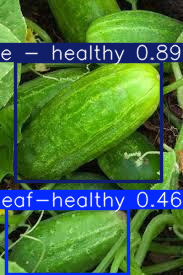

In [ ]:
annotated_img5 = result6[0].plot()
cv2_imshow(annotated_img5)